In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.192880,-2.185507,-1.617694,-1.267225,1.167748,1
1,-0.345451,1.581011,-0.878882,1.913031,-1.572591,0
2,3.081044,-3.192988,1.036201,-0.610738,1.484757,1
3,2.415303,-1.601202,-1.926245,-2.713822,1.920054,1
4,-0.534907,-1.086803,-1.404272,-0.494933,2.711198,1


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\91975\AppData\Local\Temp\ipykernel_17996\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\91975\AppData\Local\Temp\ipykernel_17996\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\91975\AppData\Local\Temp\ipykernel_17996\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col4', 'col2', 'target'], dtype='object')
Index(['col2', 'col3', 'target'], dtype='object')


In [11]:
df3

,col2,col3,target
37,-3.552776,-0.267578,1
54,-1.092905,0.299277,0
59,-1.119672,-1.406248,1
11,0.075481,-0.136642,1
69,0.610065,-0.303042,0
33,2.314903,-0.820219,0
36,-1.626718,-2.454079,1
15,2.188986,-0.944937,0
87,-0.620744,0.195413,1
13,-1.570930,0.367988,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.6666666666666666, 0.9285714285714286, 'x[0] <= 0.236\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.5, 0.7857142857142857, 'x[1] <= -2.236\ngini = 0.264\nsamples = 32\nvalue = [27, 5]'),
 Text(0.3333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[1] <= 0.408\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.5, 0.5, 'x[1] <= 0.266\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[0] <= -0.245\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.5, 0.21428571428571427, 'x[0] <= -0.169\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.357142857142857

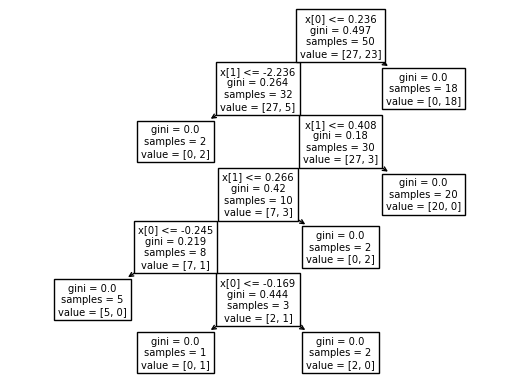

In [14]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.9285714285714286, 'x[0] <= -0.344\ngini = 0.487\nsamples = 50\nvalue = [29, 21]'),
 Text(0.25, 0.7857142857142857, 'x[1] <= 1.867\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.125, 0.6428571428571429, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.375, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.7857142857142857, 'x[1] <= 0.098\ngini = 0.257\nsamples = 33\nvalue = [28, 5]'),
 Text(0.625, 0.6428571428571429, 'x[0] <= 1.539\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.5, 0.5, 'x[1] <= -0.267\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.375, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.35714285714285715, 'x[1] <= -0.089\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.21428571428571427, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.21428571428571427, 'x[1] <= -0.007\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.07142857142857142, 'gini = 

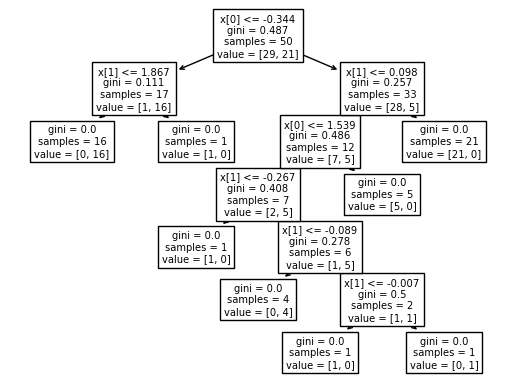

In [15]:
plot_tree(clf2)

[Text(0.4230769230769231, 0.9285714285714286, 'x[0] <= 0.12\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.15384615384615385, 0.7857142857142857, 'x[0] <= -1.106\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.07692307692307693, 0.6428571428571429, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.23076923076923078, 0.6428571428571429, 'x[0] <= -1.09\ngini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.15384615384615385, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3076923076923077, 0.5, 'x[1] <= -0.671\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.23076923076923078, 0.35714285714285715, 'x[1] <= -1.865\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.15384615384615385, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3076923076923077, 0.21428571428571427, 'x[0] <= -0.937\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.23076923076923078, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text

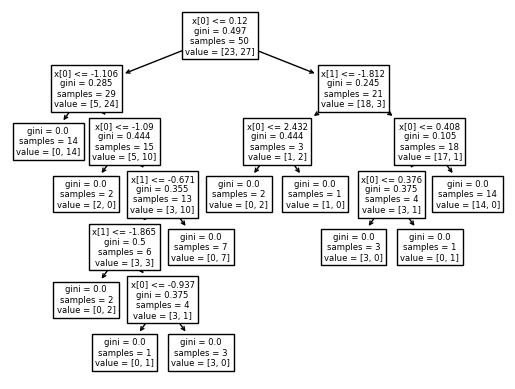

In [16]:
plot_tree(clf3)

In [17]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [18]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\91975\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
15,-0.032791,2.188986,-0.944937,0.539920,-1.549891,0
5,1.070172,-0.295100,-1.323878,0.955926,-0.661528,0
23,1.891553,0.496687,0.255619,-0.784937,-1.792252,1
14,0.201964,-0.513474,-3.654275,-3.088224,-0.143476,1
25,2.303834,0.356751,-0.745115,-1.460227,2.377938,1
82,-2.180497,0.466982,-1.808525,-0.078411,0.990213,1
43,1.216188,0.633934,-0.088211,0.889885,-1.022955,0
34,1.539455,-0.390459,-1.989557,-1.867914,0.486056,1
18,1.881762,-0.885640,0.657852,-0.350029,-0.121357,1
51,1.499860,-1.170065,-1.154478,-1.749841,0.578352,1
